### Dynamic Factor Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
sample = pd.read_csv('../Data/sample.csv', index_col = 0)
sample.index = pd.to_datetime(sample.index)
sample

,도소매업생산지수,음식숙박업생산지수,금융보험생산지수,부동산및임대업생산지수,운수보관생산지수,정보통신업,보건및사회복지업생산지수,사업서비스업생산지수,수신,여신,...,여수신,광공업생산지수,건설업생산지수,KOSPI,interest,gdpRate,CPI,export,import,label
2001-01-31,0.043741,0.036723,0.098540,0.176245,0.035659,0.180952,-0.189944,0.024793,0.248170,0.216843,...,0.314540,-0.042,0.062,-0.423656,0.0845,0.012,0.034,0.040,-0.013,2.0
2001-02-28,0.026856,0.085128,0.003425,0.008083,0.035354,0.196217,-0.059561,0.067797,0.193031,0.206761,...,0.167061,0.055,0.097,-0.359725,0.0834,0.012,0.036,0.053,0.059,1.0
2001-03-31,0.047482,0.099117,-0.107595,-0.065004,0.045524,0.202198,-0.139319,0.070568,0.185069,0.176823,...,0.201193,0.015,0.028,-0.498023,0.0826,0.012,0.040,-0.021,-0.089,3.0
2001-04-30,0.046784,0.097561,0.051282,-0.061146,0.036641,0.197701,-0.083832,0.093156,0.187747,0.155242,...,0.253957,0.045,0.058,-0.228243,0.0810,0.013,0.048,-0.104,-0.160,3.0
2001-05-31,0.058824,0.086124,0.051903,-0.047041,0.044843,0.200000,-0.150442,0.044374,0.178672,0.145010,...,0.249448,0.017,0.023,-0.178623,0.0799,0.013,0.053,-0.091,-0.130,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30,0.000917,0.038927,0.064663,0.198332,0.161491,-0.027539,0.065604,0.027985,0.071947,0.059683,...,0.167442,-0.055,0.118,-0.138213,0.0564,-0.003,0.050,-0.142,0.026,0.0
2022-12-31,0.011712,0.128472,0.192935,0.131915,0.153575,-0.007006,0.073420,0.041237,0.060566,0.056156,...,0.092995,-0.105,0.004,-0.286267,0.0557,-0.003,0.050,-0.097,-0.025,3.0
2023-01-31,0.020019,0.084520,0.078603,0.158085,0.124094,-0.001957,0.068493,0.046813,0.043138,0.051684,...,-0.027996,-0.134,0.036,-0.093716,0.0546,0.003,0.052,-0.164,-0.028,3.0
2023-02-28,0.060924,0.233115,0.143810,0.163669,0.213000,-0.011742,0.053957,0.058175,0.035709,0.050110,...,-0.070342,-0.082,0.195,-0.112139,0.0532,0.003,0.048,-0.077,0.035,0.0


In [3]:
gdp = pd.read_excel('../Data/gdp.xlsx', index_col = 0).T.iloc[:,0]
gdp

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


2000.1/4    1.9
2000.2/4    1.3
2000.3/4    2.8
2000.4/4   -0.3
2001.1/4    1.2
           ... 
2022.1/4    0.7
2022.2/4    0.8
2022.3/4    0.2
2022.4/4   -0.3
2023.1/4    0.3
Name: 　　　　　　국내총생산(GDP)(실질, 계절조정, 전기비), Length: 93, dtype: float64

In [4]:
gdp.index = pd.date_range(start = '2000-01-01', end = '2023-04-01', freq = 'Q')

In [5]:
gdp

2000-03-31    1.9
2000-06-30    1.3
2000-09-30    2.8
2000-12-31   -0.3
2001-03-31    1.2
             ... 
2022-03-31    0.7
2022-06-30    0.8
2022-09-30    0.2
2022-12-31   -0.3
2023-03-31    0.3
Freq: Q-DEC, Name: 　　　　　　국내총생산(GDP)(실질, 계절조정, 전기비), Length: 93, dtype: float64

In [6]:
sample = sample.drop(['gdpRate','label'], axis = 1)

In [7]:
matrix = pd.concat([sample, gdp], axis = 1).iloc[4:]

In [8]:
matrix

,도소매업생산지수,음식숙박업생산지수,금융보험생산지수,부동산및임대업생산지수,운수보관생산지수,정보통신업,보건및사회복지업생산지수,사업서비스업생산지수,수신,여신,실업률,여수신,광공업생산지수,건설업생산지수,KOSPI,interest,CPI,export,import,"국내총생산(GDP)(실질, 계절조정, 전기비)"
2001-01-31,0.043741,0.036723,0.098540,0.176245,0.035659,0.180952,-0.189944,0.024793,0.248170,0.216843,-0.105263,0.314540,-0.042,0.062,-0.423656,0.0845,0.034,0.040,-0.013,NaN
2001-02-28,0.026856,0.085128,0.003425,0.008083,0.035354,0.196217,-0.059561,0.067797,0.193031,0.206761,-0.035088,0.167061,0.055,0.097,-0.359725,0.0834,0.036,0.053,0.059,NaN
2001-03-31,0.047482,0.099117,-0.107595,-0.065004,0.045524,0.202198,-0.139319,0.070568,0.185069,0.176823,0.000000,0.201193,0.015,0.028,-0.498023,0.0826,0.040,-0.021,-0.089,1.2
2001-04-30,0.046784,0.097561,0.051282,-0.061146,0.036641,0.197701,-0.083832,0.093156,0.187747,0.155242,-0.088889,0.253957,0.045,0.058,-0.228243,0.0810,0.048,-0.104,-0.160,NaN
2001-05-31,0.058824,0.086124,0.051903,-0.047041,0.044843,0.200000,-0.150442,0.044374,0.178672,0.145010,-0.097561,0.249448,0.017,0.023,-0.178623,0.0799,0.053,-0.091,-0.130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30,0.000917,0.038927,0.064663,0.198332,0.161491,-0.027539,0.065604,0.027985,0.071947,0.059683,-0.115385,0.167442,-0.055,0.118,-0.138213,0.0564,0.050,-0.142,0.026,NaN
2022-12-31,0.011712,0.128472,0.192935,0.131915,0.153575,-0.007006,0.073420,0.041237,0.060566,0.056156,-0.142857,0.092995,-0.105,0.004,-0.286267,0.0557,0.050,-0.097,-0.025,-0.3
2023-01-31,0.020019,0.084520,0.078603,0.158085,0.124094,-0.001957,0.068493,0.046813,0.043138,0.051684,-0.121951,-0.027996,-0.134,0.036,-0.093716,0.0546,0.052,-0.164,-0.028,NaN
2023-02-28,0.060924,0.233115,0.143810,0.163669,0.213000,-0.011742,0.053957,0.058175,0.035709,0.050110,-0.088235,-0.070342,-0.082,0.195,-0.112139,0.0532,0.048,-0.077,0.035,NaN


In [9]:
test = matrix.copy()

In [10]:
test.columns = ['retail','restaurant','finance','real_estate','delivery','telecom','health','service','saving','unemployment','bank','debt','mine','building','kospi','interest','cpi','export','import','gdp']

In [79]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace import dynamic_factor

mod = dynamic_factor.DynamicFactor(test, k_factors = 3, factor_order = 1)

res = mod.fit(method='powell', cov_type='robust', disp=False)

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: >

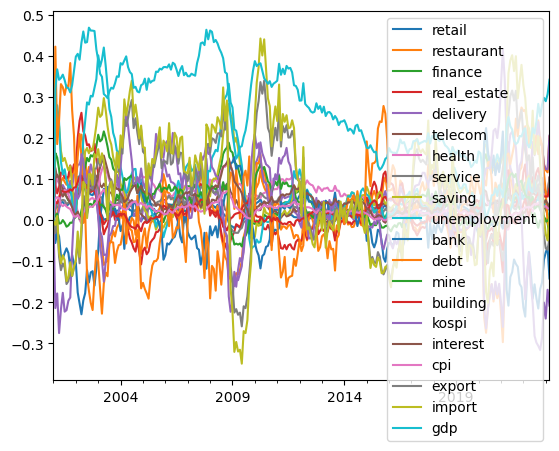

In [74]:
res.fittedvalues.plot()

In [75]:
matrix

,도소매업생산지수,음식숙박업생산지수,금융보험생산지수,부동산및임대업생산지수,운수보관생산지수,정보통신업,보건및사회복지업생산지수,사업서비스업생산지수,수신,여신,실업률,여수신,광공업생산지수,건설업생산지수,KOSPI,interest,CPI,export,import,"국내총생산(GDP)(실질, 계절조정, 전기비)"
2001-01-31,0.043741,0.036723,0.098540,0.176245,0.035659,0.180952,-0.189944,0.024793,0.248170,0.216843,-0.105263,0.314540,-0.042,0.062,-0.423656,0.0845,0.034,0.040,-0.013,NaN
2001-02-28,0.026856,0.085128,0.003425,0.008083,0.035354,0.196217,-0.059561,0.067797,0.193031,0.206761,-0.035088,0.167061,0.055,0.097,-0.359725,0.0834,0.036,0.053,0.059,NaN
2001-03-31,0.047482,0.099117,-0.107595,-0.065004,0.045524,0.202198,-0.139319,0.070568,0.185069,0.176823,0.000000,0.201193,0.015,0.028,-0.498023,0.0826,0.040,-0.021,-0.089,1.2
2001-04-30,0.046784,0.097561,0.051282,-0.061146,0.036641,0.197701,-0.083832,0.093156,0.187747,0.155242,-0.088889,0.253957,0.045,0.058,-0.228243,0.0810,0.048,-0.104,-0.160,NaN
2001-05-31,0.058824,0.086124,0.051903,-0.047041,0.044843,0.200000,-0.150442,0.044374,0.178672,0.145010,-0.097561,0.249448,0.017,0.023,-0.178623,0.0799,0.053,-0.091,-0.130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30,0.000917,0.038927,0.064663,0.198332,0.161491,-0.027539,0.065604,0.027985,0.071947,0.059683,-0.115385,0.167442,-0.055,0.118,-0.138213,0.0564,0.050,-0.142,0.026,NaN
2022-12-31,0.011712,0.128472,0.192935,0.131915,0.153575,-0.007006,0.073420,0.041237,0.060566,0.056156,-0.142857,0.092995,-0.105,0.004,-0.286267,0.0557,0.050,-0.097,-0.025,-0.3
2023-01-31,0.020019,0.084520,0.078603,0.158085,0.124094,-0.001957,0.068493,0.046813,0.043138,0.051684,-0.121951,-0.027996,-0.134,0.036,-0.093716,0.0546,0.052,-0.164,-0.028,NaN
2023-02-28,0.060924,0.233115,0.143810,0.163669,0.213000,-0.011742,0.053957,0.058175,0.035709,0.050110,-0.088235,-0.070342,-0.082,0.195,-0.112139,0.0532,0.048,-0.077,0.035,NaN


### Proportional Denton Method

In [21]:
from statsmodels.tsa.interp.denton import dentonm

indicator = [50,100,150,100] * 5 # high freq
benchmark = [500,400,300,400,500] # low freq
benchmarked = dentonm(indicator, benchmark, freq="aq")

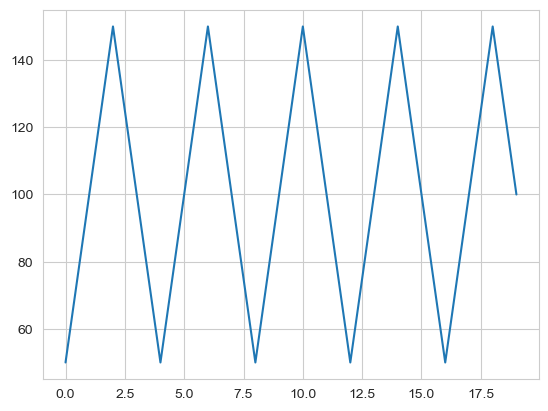

In [24]:
import matplotlib.pyplot as plt

plt.plot(indicator)

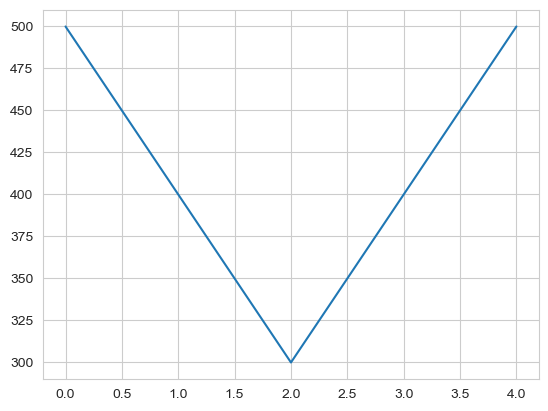

In [26]:
plt.plot(benchmark)

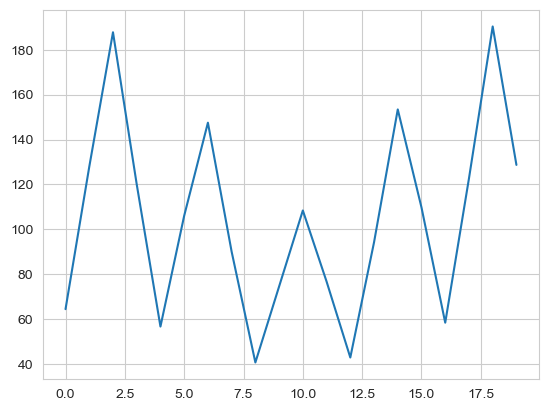

In [28]:
plt.plot(benchmarked)

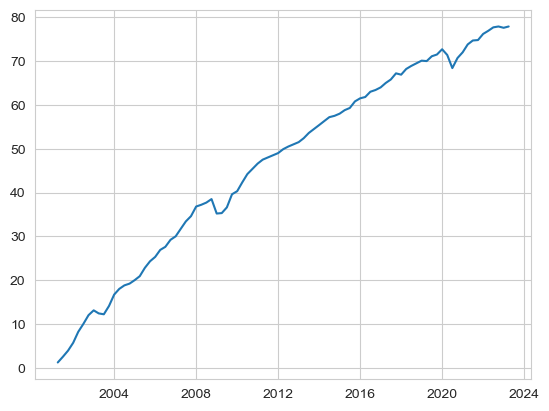

In [81]:
plt.plot(test.iloc[:,-1].dropna().cumsum())

In [95]:
benchmarked = dentonm(test.iloc[:,-4].cumsum(), test.iloc[:,-1].dropna().cumsum(), freq = "qm")

In [96]:
benchmarked

array([ 0.20140721,  0.40548879,  0.593104  ,  0.721593  ,  0.83396477,
        0.94444224,  1.12225834,  1.31049871,  1.46724295,  1.65296134,
        1.88408291,  2.16295575,  2.47983029,  2.75612171,  2.964048  ,
        3.11751803,  3.32839134,  3.55409063,  3.79252094,  4.003536  ,
        4.20394307,  4.32650209,  4.39879224,  4.37470568,  4.22996074,
        4.11375265,  4.0562866 ,  4.00706364,  4.03255024,  4.16038612,
        4.42062835,  4.68967134,  4.98970031,  5.32769012,  5.59019839,
        5.78211149,  5.89491398,  6.00298404,  6.10210198,  6.21077826,
        6.2775292 ,  6.31169254,  6.32953228,  6.39903186,  6.47143587,
        6.58582229,  6.67302899,  6.74114872,  6.81804525,  6.95159549,
        7.13035926,  7.37858024,  7.61020198,  7.81121778,  7.98414225,
        8.10298206,  8.21287569,  8.28259616,  8.41345415,  8.60394969,
        8.83528582,  8.99020398,  9.0745102 ,  9.08540941,  9.17553161,
        9.33905898,  9.57477379,  9.75897499,  9.86625123,  9.88

<Axes: >

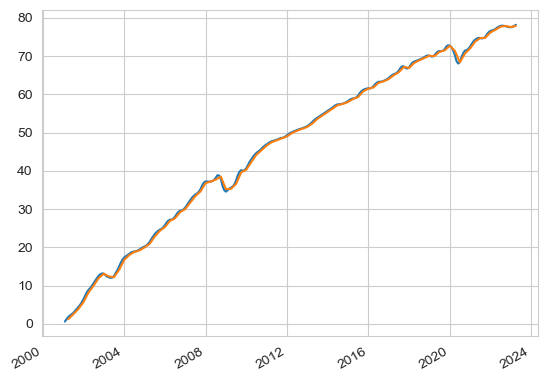

In [98]:
plt.plot(pd.Series(benchmarked * 3, index = test.index))
test.iloc[:,-1].dropna().cumsum().plot()

In [122]:
pd.Series(benchmarked * 3, index = test.index).diff()

2001-01-31         NaN
2001-02-28    0.612245
2001-03-31    0.562846
2001-04-30    0.385467
2001-05-31    0.337115
                ...   
2022-11-30   -0.118892
2022-12-31   -0.021998
2023-01-31    0.101896
2023-02-28    0.219235
2023-03-31    0.318731
Length: 267, dtype: float64

In [124]:
gdp_new = pd.Series(benchmarked * 3, index = test.index, name = 'gdp_estimated').diff().fillna(0)

In [117]:
test.iloc[:,-1].dropna()

2001-03-31    1.2
2001-06-30    1.3
2001-09-30    1.4
2001-12-31    1.8
2002-03-31    2.5
             ... 
2022-03-31    0.7
2022-06-30    0.8
2022-09-30    0.2
2022-12-31   -0.3
2023-03-31    0.3
Name: gdp, Length: 89, dtype: float64

Text(0.5, 1.0, 'Proportional Denton Methods')

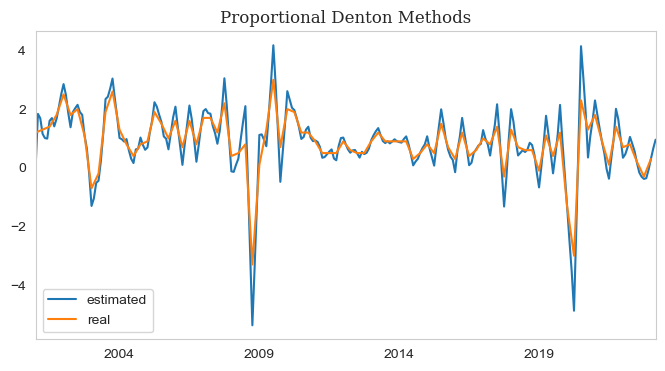

In [132]:
plt.figure(figsize = (8,4))
(gdp_new*3).plot(label = 'estimated')
test.iloc[:,-1].dropna().plot(label = 'real')
plt.legend()
plt.grid(False)
plt.title('Proportional Denton Methods', fontsize = 12, fontfamily = 'Serif')